In [1]:
%%capture
import matplotlib as mpl
import matplotlib.font_manager as fm
import os
import os.path

!wget -O OpenSans-Light.ttf https://github.com/openmaptiles/fonts/raw/master/open-sans/OpenSans-Light.ttf
font = fm.FontEntry(fname=os.path.join(os.getcwd(), 'OpenSans-Light.ttf'), name="Open Sans")
fm.fontManager.ttflist.append(font)

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rcParams['font.size'] = 30
rc('font', family='sans-serif')
rcParams['font.family'] = 'Open Sans'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'

import numpy as np
from scipy import special

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']


# The Two Faces of Chebyshev Polynomials

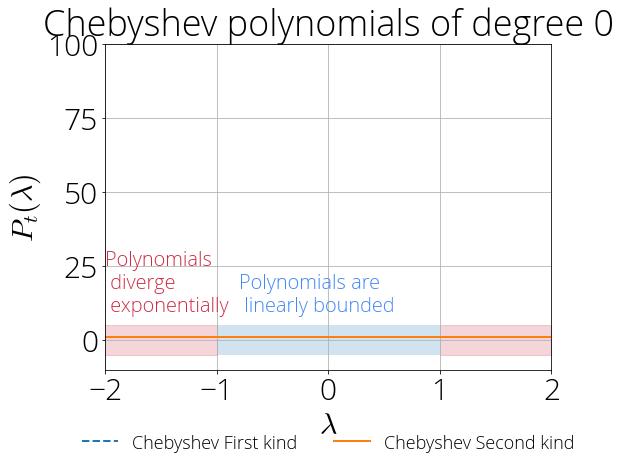

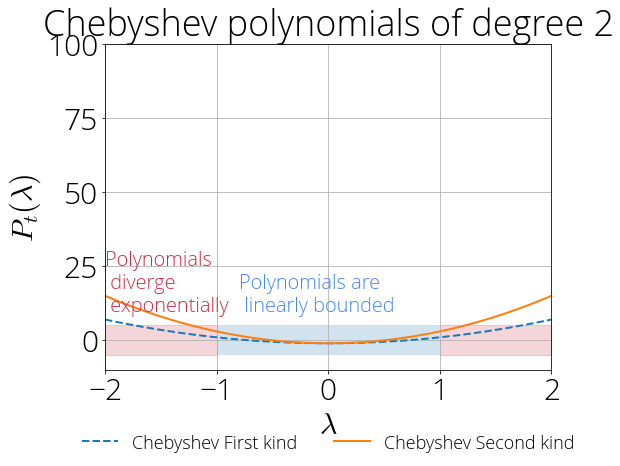

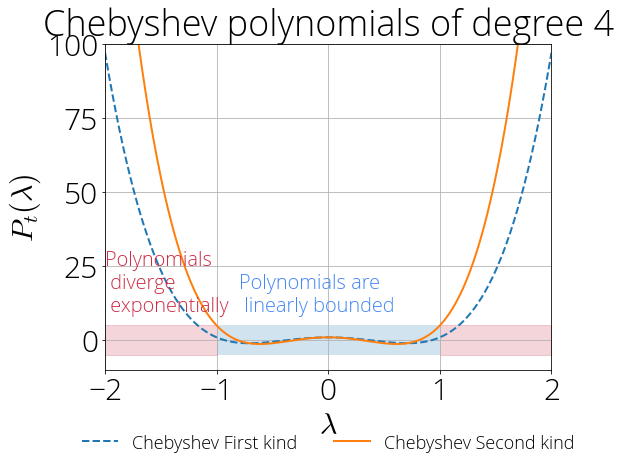

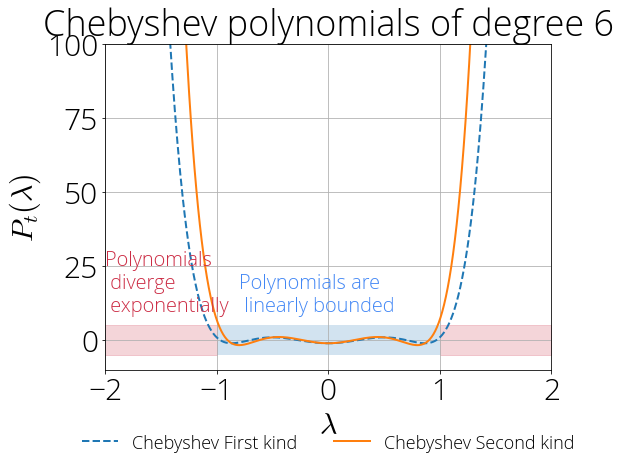

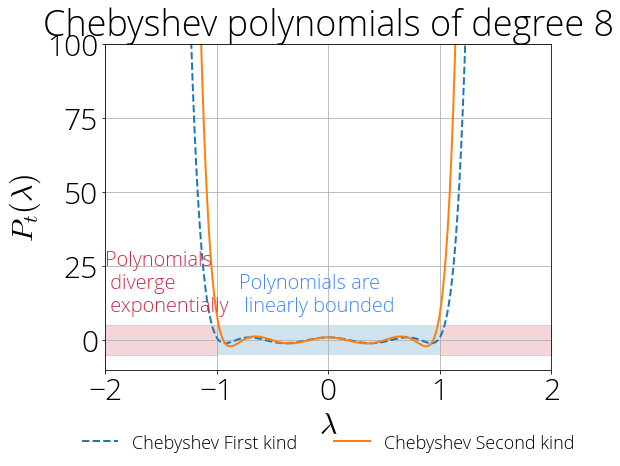

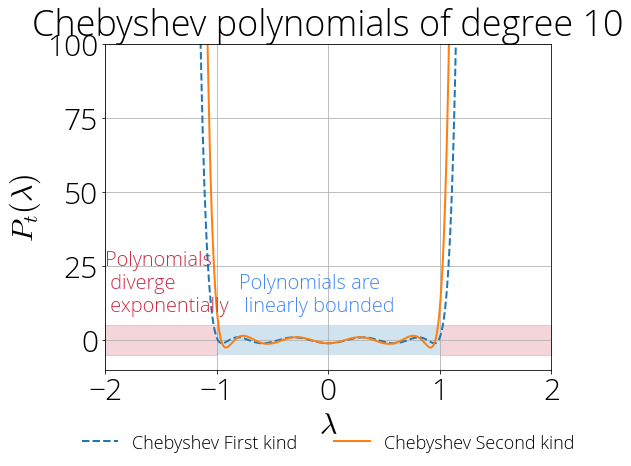

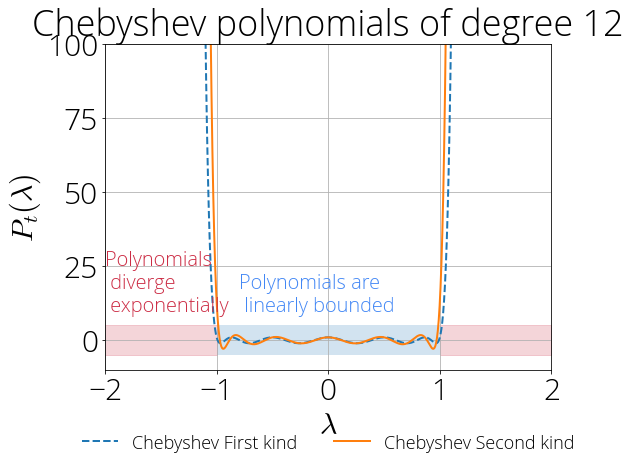

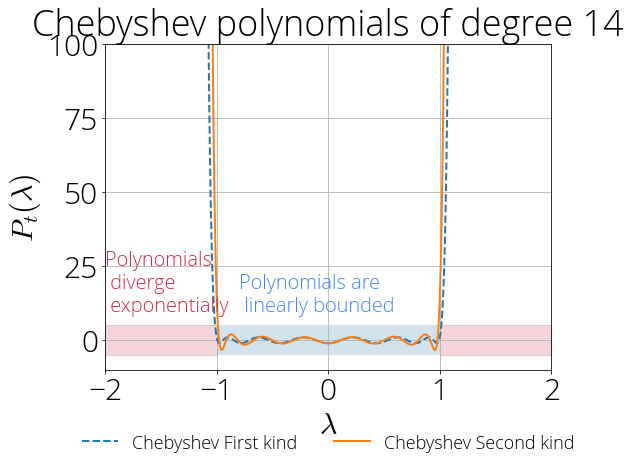

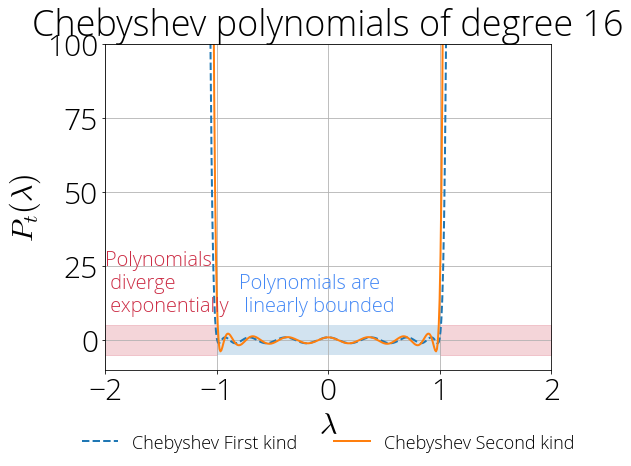

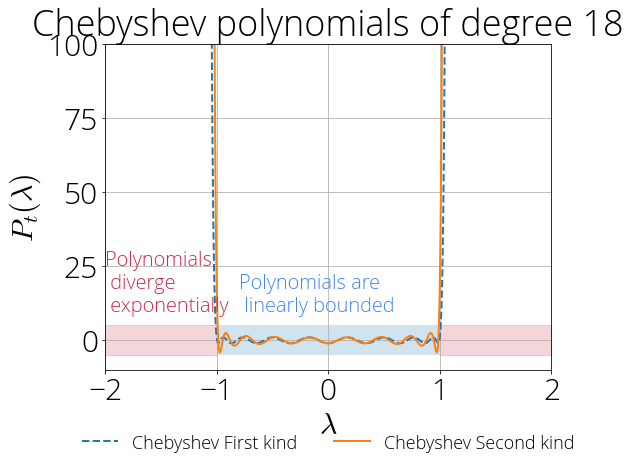

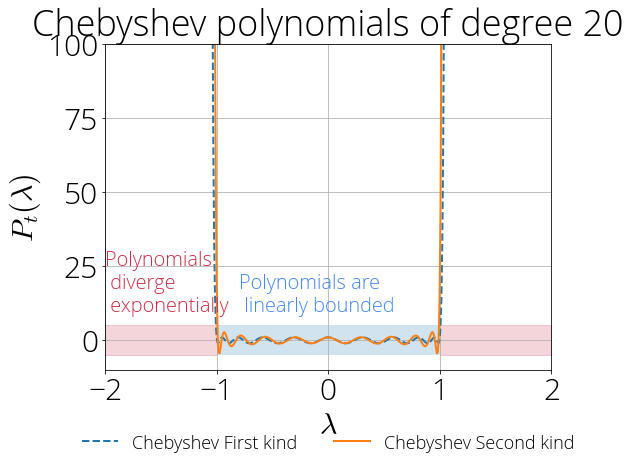

In [15]:

for i in range(0, 22, 2):
  xx = np.linspace(-2, 2, 500)
  f = plt.figure(figsize=(8, 6))
  plt.plot(xx, special.eval_chebyt(i, xx), '--', lw=2, label="Chebyshev First kind")
  plt.plot(xx, special.eval_chebyu(i, xx),  lw=2, label="Chebyshev Second kind")
  plt.fill_between(np.linspace(-1, 1), -5, 5, alpha=0.2)
  plt.fill_between(np.linspace(-2, -1), -5, 5, alpha=0.2, color='#cc2d45')
  plt.fill_between(np.linspace(1, 2), -5, 5, alpha=0.2, color='#cc2d45')

  plt.title("Chebyshev polynomials of degree %s" % i)
  plt.xlabel("$\lambda$")
  plt.ylabel("$P_t(\lambda)$")
  plt.ylim((-10, 100))
  plt.xlim((-2, 2))
  plt.grid()
  plt.text(-0.8, 10, "Polynomials are \n linearly bounded", fontsize=20, c='#4287f5')
  plt.text(-2, 10, "Polynomials \n diverge \n exponentially", fontsize=20, c='#cc2d45')

  plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),
          ncol=2, fancybox=True, shadow=False, frameon=False,
          fontsize=18)
  # apngasm chebyshev_interval.png chebyshev_interval_01.png 1 1
  f_path = 'chebyshev_interval_%02d.png' % (i // 2)
  plt.savefig(f_path, dpi=100, bbox_inches='tight', facecolor='white')
  plt.show()

In [16]:
!convert -delay 200 -loop 0 chebyshev_interval_??.png ../../img/2022-12-01-hitchhikers-momentum/two_phases_chebyshev.gif

/bin/bash: convert: command not found


# The final plot

In [ ]:
# just an example, can be changed
mu = 0.5
L = 2.

n_grid = 2000
all_m = np.linspace(1, 1e-12, n_grid)
all_h = np.linspace(0, 4/L, n_grid)
m_grid, h_grid = np.meshgrid(all_m, all_h)
m_polyak = ((np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))) ** 2
h_polyak = (2 / (np.sqrt(L) + np.sqrt(mu))) ** 2


def sigma(x, m, h):
  return (1 + m - h * x) / (2 * np.sqrt(m))

def varphi(xi):
  return np.abs(xi) + np.sqrt(xi**2 - 1)


# The Two Faces of Chebyshev Polynomials

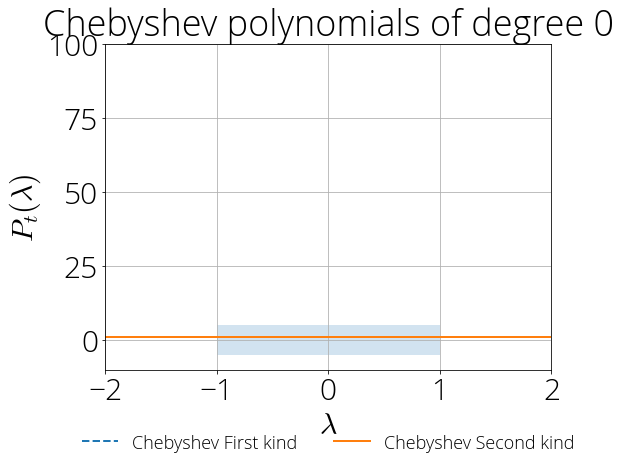

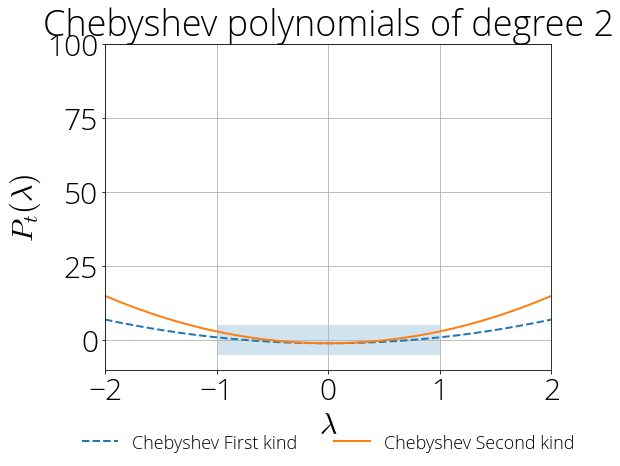

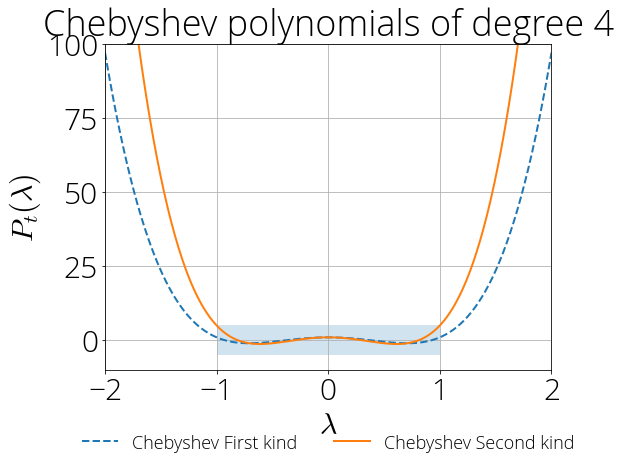

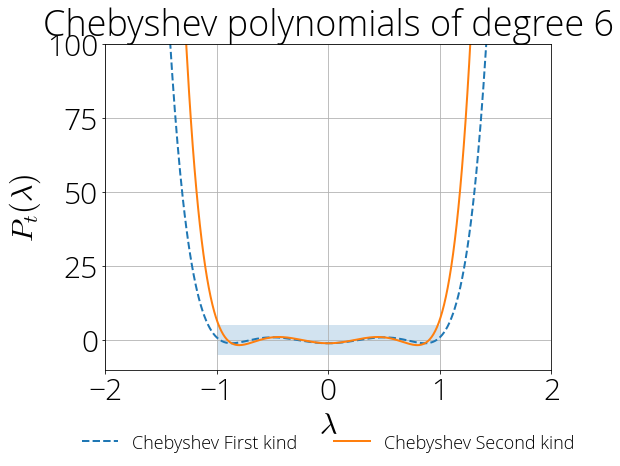

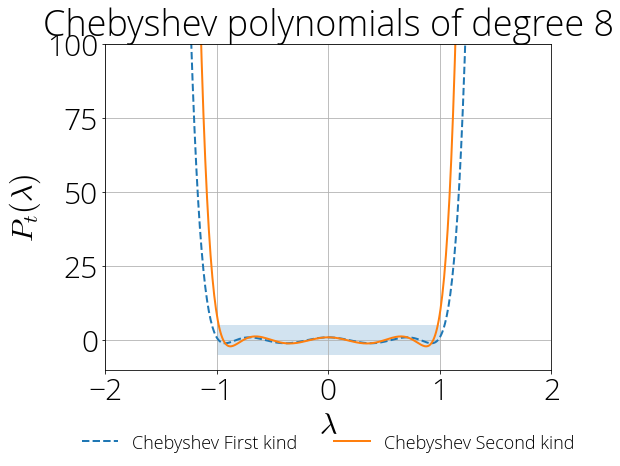

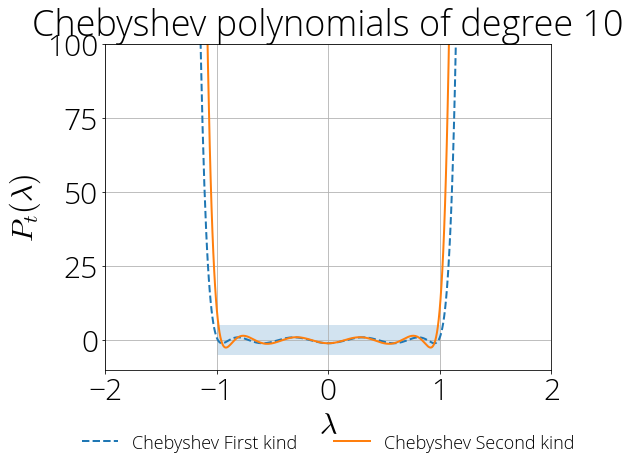

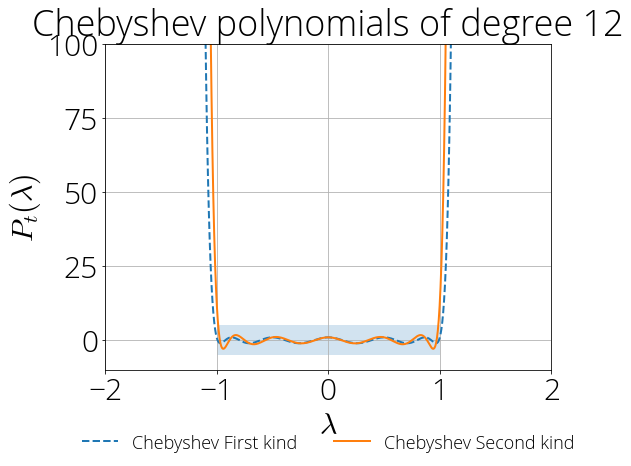

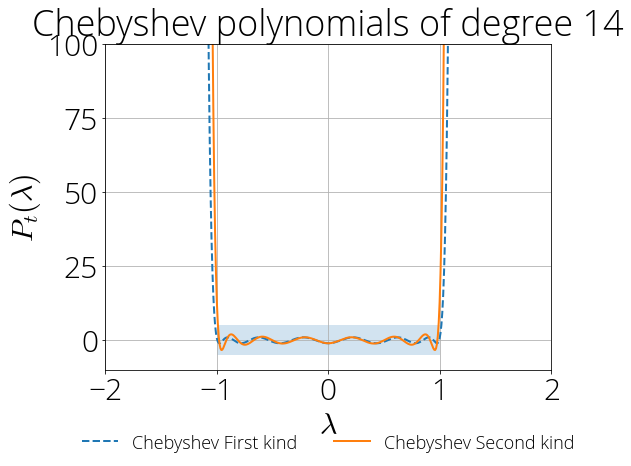

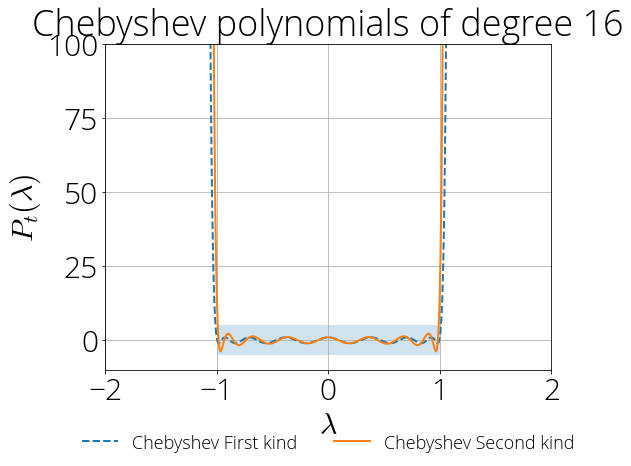

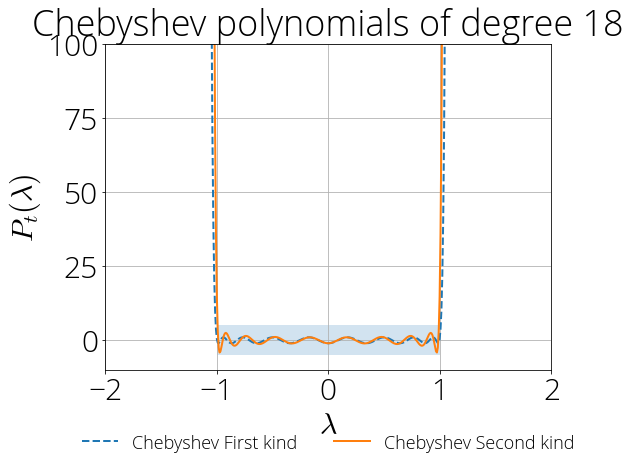

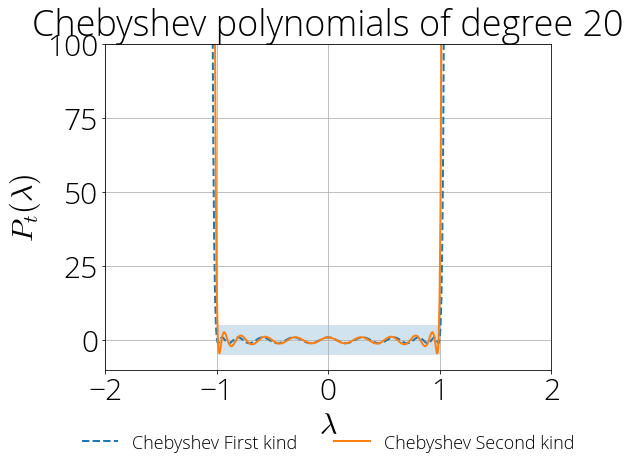

In [15]:

for i in range(0, 22, 2):
  xx = np.linspace(-2, 2, 500)
  f = plt.figure(figsize=(8, 6))
  plt.plot(xx, special.eval_chebyt(i, xx), '--', lw=2, label="Chebyshev First kind")
  plt.plot(xx, special.eval_chebyu(i, xx),  lw=2, label="Chebyshev Second kind")
  plt.fill_between(np.linspace(-1, 1), -5, 5, alpha=0.2)

  plt.title("Chebyshev polynomials of degree %s" % i)
  plt.xlabel("$\lambda$")
  plt.ylabel("$P_t(\lambda)$")
  plt.ylim((-10, 100))
  plt.xlim((-2, 2))
  plt.grid()

  plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),
          ncol=2, fancybox=True, shadow=False, frameon=False,
          fontsize=18)
  # apngasm chebyshev_interval.png chebyshev_interval_01.png 1 1
  f_path = 'chebyshev_interval_%02d.png' % (i // 2)
  plt.savefig(f_path, dpi=100, bbox_inches='tight', facecolor='white')
  plt.show()

In [16]:
!convert -delay 10 -loop 0 chebyshev_interval_??.png two_phases_chebyshev.gif

/bin/bash: convert: command not found


# The final plot

In this plot we will show the asymptotic convergence rate in color as a function of the momentum parameter (x axis) and the step-size (y axis). To get the convergence rate we perform a grid search over the momentum parameter and the step-size.

In [4]:
rate = np.zeros((n_grid, n_grid))

for i in range(n_grid):
  for j in range(n_grid):
    m, h = m_grid[i, j], h_grid[i, j]
    smax = sigma(mu, m, h)
    smin = sigma(L, m, h)

    if np.abs(smin) <= 1 and np.abs(smax) <= 1:
      rate[i, j] = np.sqrt(m)
    else:
      z = max(np.abs(smin), np.abs(smax))
      tmp = np.sqrt(m) * (z + np.sqrt(z ** 2 - 1))
      if tmp <= 1:
        rate[i, j] = tmp
      else:
        rate[i, j] = np.nan


Polyak momentum=0.1111111111111111 and step-size=0.8888888888888886


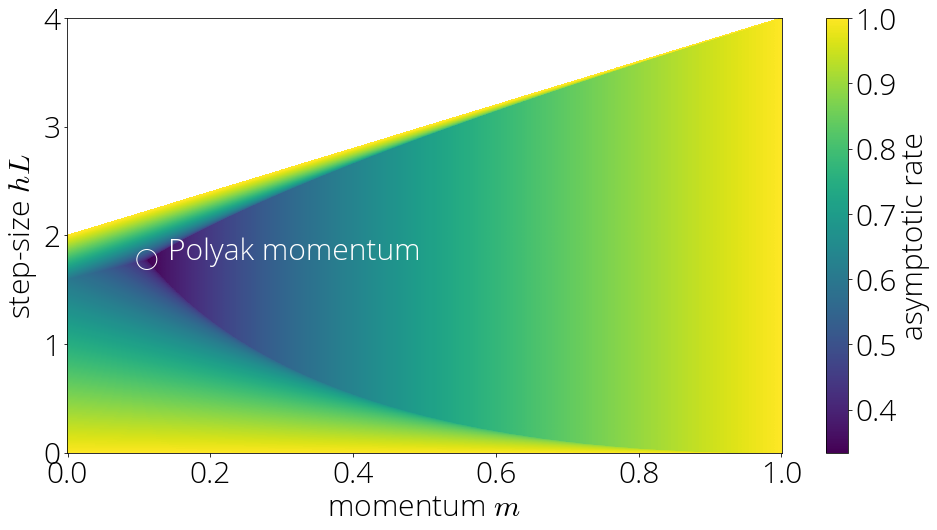

In [5]:
plt.figure(figsize=(16, 8))
plt.pcolor(m_grid, h_grid * L, rate)
plt.xlabel(r"momentum $m$")
plt.ylabel("step-size $h L$")
cbar = plt.colorbar()
cbar.ax.set_ylabel('asymptotic rate')

plt.scatter(m_polyak, h_polyak * L, s=400, facecolors='none', edgecolors='w')
plt.text(m_polyak + 0.03, h_polyak * L, "Polyak momentum", c='w')

f_path = 'rate_convergence_momentum.png'
# force the background color to be black for the black theme
plt.savefig(f_path, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

# The Robust Region

In [ ]:
rate = np.zeros((n_grid, n_grid))

plt.figure(figsize=(14, 8))
plt.plot(all_m, L * (1 - np.sqrt(all_m))**2/mu, lw=3, color=colors[0])
plt.plot(all_m, L * (1 + np.sqrt(all_m))**2/L, lw=3, color=colors[1])
plt.xlabel(r"momentum $m$")
plt.ylabel("step-size $h L$")
plt.text(0.64, 0.5, r"$h = \frac{(1 - \sqrt{m})^2}{\mu}$", color=colors[0], fontsize=35)
plt.text(0.64, 3., r"$h = \frac{(1 + \sqrt{m})^2}{L}$", color=colors[1], fontsize=35)

# plot only those for which the momentum is larger than in Polyak
m_polyak = ((np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))) ** 2
idx = all_m > m_polyak
plt.fill_between(
    all_m[idx],
    L * (1 - np.sqrt(all_m[idx]))**2/mu, 
    L * (1 + np.sqrt(all_m[idx]))**2/L,
    color="grey", alpha=0.3)
plt.text(0.5, 1.9, r"Robust Region", color="black", fontsize=35)
plt.ylim((0, L * all_h.max()))
plt.xlim((0, all_m.max()))

f_path = 'sketch_robust_region.png'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight', facecolor='white')

plt.show()

In [ ]:
rate = np.zeros((n_grid, n_grid))

for i in range(n_grid):
  for j in range(n_grid):
    m, h = m_grid[i, j], h_grid[i, j]

    if np.abs(sigma(mu, m, h)) <= 1 and np.abs(sigma(L, m, h)) <= 1:
      rate[i, j] = np.sqrt(m)
    else:
      rate[i, j] = np.nan
        

plt.figure(figsize=(14+2, 8))
plt.pcolor(m_grid, L * h_grid, rate)
plt.title("Robust region")
plt.xlabel(r"momentum $m$")
plt.ylabel("step-size $h L$")
cbar = plt.colorbar()
cbar.ax.set_ylabel('asymptotic rate')


f_path = 'rate_robust_region.png'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

# The lazy region

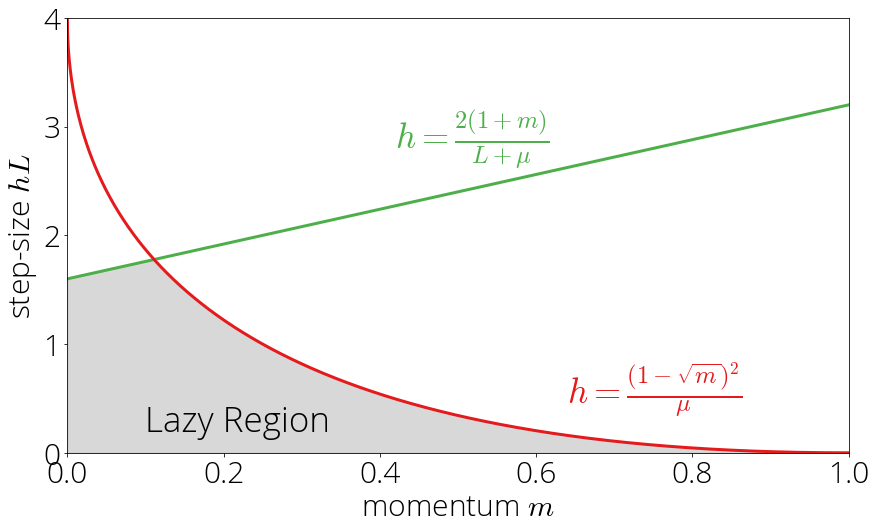

In [8]:
plt.figure(figsize=(14, 8))
plt.plot(all_m, L * 2 * (1 + all_m) / (L + mu),lw=3, color=colors[2])
plt.plot(all_m, L * (1 - np.sqrt(all_m))**2/mu, lw=3, color=colors[0])
plt.fill_between(all_m,
                 np.zeros_like(all_m), 
                 L * np.fmin((1 - np.sqrt(all_m))**2/mu, 2 * (1 + all_m) / (L + mu)),
                 color="grey", alpha=0.3)

plt.xlabel(r"momentum $m$")
plt.ylim((0, L * all_h.max()))
plt.xlim((0, all_m.max()))
plt.ylabel("step-size $h L$")
plt.text(0.42, 2.8,  r"$h = \frac{2(1+m)}{L+\mu}$", color=colors[2], fontsize=35)
plt.text(0.64, 0.45,r"$h = \frac{(1 - \sqrt{m})^2}{\mu}$", color=colors[0], fontsize=35)
plt.text(0.1, 0.2, r"Lazy Region", color="Black", fontsize=35)

f_path = 'sketch_lazy_region.png'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()


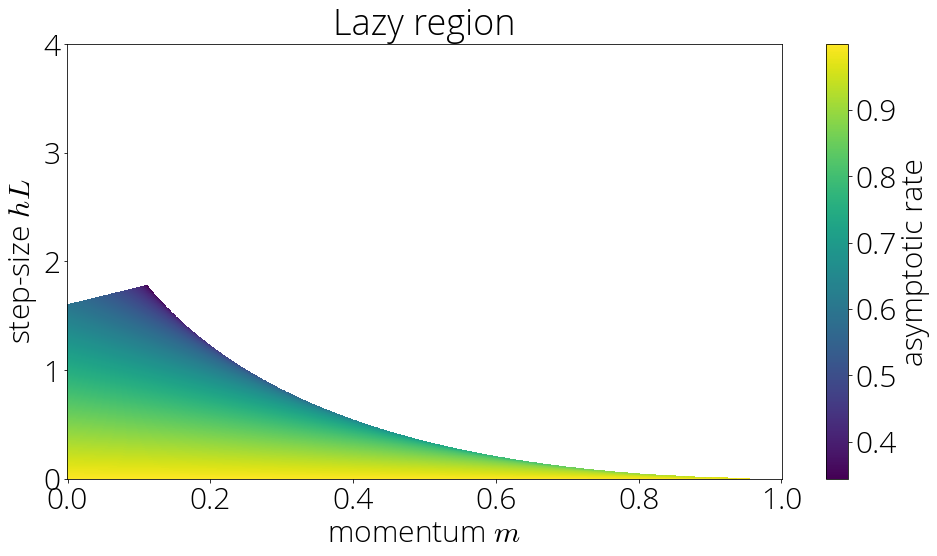

In [9]:
rate = np.zeros((n_grid, n_grid))
rate[:, :] = np.nan

for i in range(n_grid):
  for j in range(n_grid):
    m, h = m_grid[i, j], h_grid[i, j]

    if np.abs(sigma(mu, m, h)) > 1 and np.abs(sigma(mu, m, h)) > np.abs(sigma(L, m, h)):
      r = np.sqrt(m) * varphi(sigma(mu, m, h))
      if r <= 1:
        rate[i, j] = r
        

plt.figure(figsize=(14+2, 8))
plt.pcolor(m_grid, L * h_grid, rate)
plt.title("Lazy region")
plt.xlabel(r"momentum $m$")
plt.ylabel("step-size $h L$")
cbar = plt.colorbar()
cbar.ax.set_ylabel('asymptotic rate')


f_path = 'rate_lazy_region.png'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

# Knife's edge

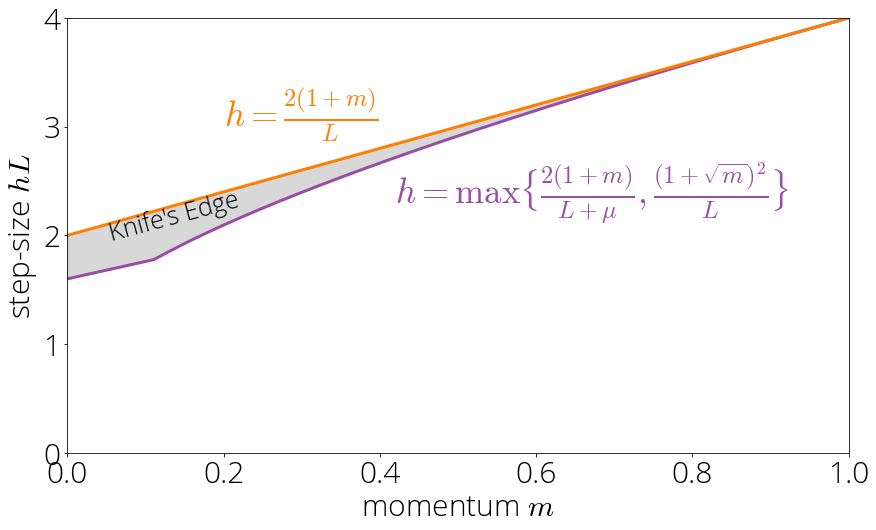

In [10]:
rate = np.zeros((n_grid, n_grid))

plt.figure(figsize=(14, 8))
idx = all_m < m_polyak
plt.plot(all_m, L * np.fmax(2 * (1 + all_m) / (L + mu), (1 + np.sqrt(all_m))**2/L),
          lw=3, color=colors[3])

plt.plot(all_m, L * 2 * (1 + all_m) / L, lw=3, color=colors[4])
plt.fill_between(all_m, 
                 L * np.fmax(2 * (1 + all_m) / (L + mu), (1 + np.sqrt(all_m))**2/L),
                 L * 2 * (1 + all_m) / L,
                 color="grey", alpha=0.3)

plt.xlabel(r"momentum $m$")
plt.ylim((0, L * all_h.max()))
plt.xlim((0, all_m.max()))
plt.ylabel("step-size $h L$")
plt.text(0.42, 2.3,  r"$h = \max\{\frac{2(1+m)}{L+\mu}, \frac{(1+\sqrt{m})^2}{L}\}$",
         color=colors[3],fontsize=35)
plt.text(0.2, 3.,r"$h = \frac{2(1 +m)}{L}$", color=colors[4],  fontsize=35)
plt.text(0.05, 1.95, r"Knife's Edge", color="black", fontsize=25, rotation=15)

f_path = 'sketch_knife_edge.png'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight', facecolor='white')

plt.show()


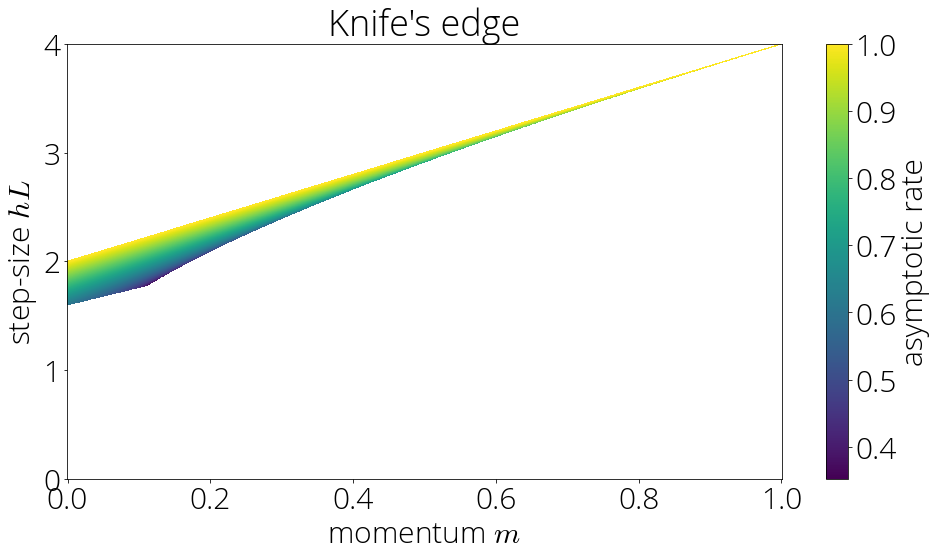

In [11]:
rate = np.zeros((n_grid, n_grid))
rate[:, :] = np.nan

for i in range(n_grid):
  for j in range(n_grid):
    m, h = m_grid[i, j], h_grid[i, j]

    if np.abs(sigma(L, m, h)) > np.abs(sigma(mu, m, h)) and np.abs(sigma(L, m, h)) > 1:
      r = np.sqrt(m) * varphi(sigma(L, m, h))
      if r <= 1:
        rate[i, j] = r


plt.figure(figsize=(14+2, 8))
plt.pcolor(m_grid, L * h_grid, rate)
plt.title("Knife's edge")
plt.xlabel(r"momentum $m$")
plt.ylabel("step-size $h L$")
cbar = plt.colorbar()
cbar.ax.set_ylabel('asymptotic rate')


f_path = 'rate_knife_edge.png'
plt.savefig(f_path, transparent=True, dpi=100, bbox_inches='tight', facecolor='white')
plt.show()